# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

csv = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_api_key = "6ca7295c1b0ae5a0701369f7cefb416e"


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | mahebourg
Processing Record 2 | vaini
Processing Record 3 | tasiilaq
Processing Record 4 | ios
Processing Record 5 | carolina
Processing Record 6 | avarua
Processing Record 7 | busselton
Processing Record 8 | ushuaia
Processing Record 9 | saint-philippe
Processing Record 10 | paita
Processing Record 11 | rikitea
Processing Record 12 | singkawang
Processing Record 13 | georgetown
Processing Record 14 | ancud
Processing Record 15 | namibe
City not found. Skipping...
Processing Record 16 | salta
Processing Record 17 | metro
Processing Record 18 | neuquen
City not found. Skipping...
City not found. Skipping...
Processing Record 19 | upernavik
Processing Record 20 | bethel
Processing Record 21 | hithadhoo
Processing Record 22 | khatanga
Processing Record 23 | bredasdorp
Processing Record 24 | vestmanna
Processing Record 25 | middle island
City not found. Skipping...
Processing Record 26 | jamestown
Processing Record 27

Processing Record 229 | vernon
Processing Record 230 | laguna
Processing Record 231 | mareeba
Processing Record 232 | satao
Processing Record 233 | teya
Processing Record 234 | saraza
Processing Record 235 | port alfred
Processing Record 236 | kieta
Processing Record 237 | nyurba
Processing Record 238 | khorixas
Processing Record 239 | san rafael
Processing Record 240 | puerto carreno
Processing Record 241 | itarema
Processing Record 242 | roebourne
Processing Record 243 | kaitangata
Processing Record 244 | yangambi
Processing Record 245 | kloulklubed
Processing Record 246 | lanxi
Processing Record 247 | codrington
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 248 | tarnos
Processing Record 249 | coquimbo
Processing Record 250 | tyup
Processing Record 251 | talaya
Processing Record 252 | soe
Processing Record 253 | belmonte
Processing Record 254 | elban
Processing Record 255 | manavalakurichi
Processing Record 256 | makat
Processi

Processing Record 457 | agirish
Processing Record 458 | russkaya polyana
Processing Record 459 | klaksvik
Processing Record 460 | quzhou
Processing Record 461 | fare
Processing Record 462 | ugoofaaru
Processing Record 463 | pacific grove
Processing Record 464 | luena
Processing Record 465 | bom jesus
Processing Record 466 | partizansk
City not found. Skipping...
Processing Record 467 | san felipe
Processing Record 468 | manokwari
Processing Record 469 | ojinaga
Processing Record 470 | hambantota
Processing Record 471 | muros
City not found. Skipping...
Processing Record 472 | lagoa santa
Processing Record 473 | south lake tahoe
Processing Record 474 | aksarayskiy
Processing Record 475 | nishihara
Processing Record 476 | urumqi
City not found. Skipping...
Processing Record 477 | kachug
Processing Record 478 | quetigny
Processing Record 479 | ust-ilimsk
Processing Record 480 | mahina
Processing Record 481 | olafsvik
Processing Record 482 | vila franca do campo
Processing Record 483 | les

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weather)

# Display count of weather values per column.
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Mahébourg,40,MU,1600874282,68,-20.41,57.70,71.6,4.70
1,Vaini,40,TO,1600874320,88,-21.20,-175.20,71.6,8.05
2,Tasiilaq,20,GL,1600874377,88,65.61,-37.64,32.0,3.36
3,Íos,0,GR,1600874491,53,36.73,25.28,79.0,6.93
4,Carolina,40,PR,1600874389,55,18.38,-65.96,91.4,6.93


In [11]:
df_weather.to_csv('weather_data.csv')

df_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Mahébourg,40,MU,1600874282,68,-20.41,57.70,71.60,4.70
1,Vaini,40,TO,1600874320,88,-21.20,-175.20,71.60,8.05
2,Tasiilaq,20,GL,1600874377,88,65.61,-37.64,32.00,3.36
3,Íos,0,GR,1600874491,53,36.73,25.28,79.00,6.93
4,Carolina,40,PR,1600874389,55,18.38,-65.96,91.40,6.93
...,...,...,...,...,...,...,...,...,...
544,Xining,69,CN,1600875168,63,36.62,101.77,52.72,0.63
545,Imbituba,75,BR,1600875170,64,-28.24,-48.67,69.80,11.41
546,Seaforth,20,JM,1600875171,74,17.94,-76.46,87.80,14.99
547,Rūdbār,0,AF,1600875172,20,30.15,62.60,74.16,17.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
for humidity in df_weather["Humidity"]:
    if humidity < 100:
        print(humidity)

68
88
88
53
55
94
50
73
64
77
73
85
79
58
75
23
86
44
97
55
62
88
63
87
43
82
88
56
72
60
75
88
87
72
78
64
61
72
28
95
81
82
87
82
70
40
75
74
69
23
14
78
53
58
62
8
78
77
80
62
62
39
68
82
94
71
89
75
49
82
94
81
81
63
68
64
82
51
69
63
74
81
72
88
79
78
78
33
11
32
71
69
20
64
85
43
29
87
83
82
64
80
74
30
71
96
78
49
61
90
9
67
93
83
88
75
54
88
64
48
93
81
56
78
57
77
75
71
58
64
81
63
30
57
72
90
83
94
81
60
59
66
44
64
87
74
68
68
60
55
93
86
16
99
89
64
26
87
92
92
61
93
25
79
49
55
67
78
88
82
70
35
64
85
66
59
78
86
83
43
93
65
70
88
47
86
73
63
74
53
80
94
78
91
66
52
46
21
30
75
40
75
63
72
63
69
78
78
87
64
79
78
74
60
75
76
94
93
62
87
86
50
82
82
72
83
85
89
78
61
72
74
12
22
49
47
48
79
57
88
92
82
77
82
53
96
84
69
85
88
33
70
21
59
94
23
71
86
94
69
15
76
34
82
13
64
68
93
60
77
57
99
94
96
74
76
74
33
94
87
77
73
82
76
88
31
63
89
86
83
42
61
84
70
77
44
86
69
69
99
40
96
86
74
28
62
73
93
55
49
43
86
97
74
47
75
86
61
89
64
67
80
86
13
60
79
74
86
40
81
69
62
45
86


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df = pd.DataFrame(df_weather)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Mahébourg,40,MU,1600874282,68,-20.41,57.70,71.6,4.70
1,Vaini,40,TO,1600874320,88,-21.20,-175.20,71.6,8.05
2,Tasiilaq,20,GL,1600874377,88,65.61,-37.64,32.0,3.36
3,Íos,0,GR,1600874491,53,36.73,25.28,79.0,6.93
4,Carolina,40,PR,1600874389,55,18.38,-65.96,91.4,6.93


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

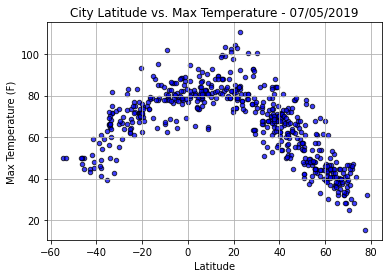

In [20]:
plt.scatter(df['Lat'], df['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature - 07/05/2019')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Max_Temp_vs_Lat.png')

plt.show()


## Latitude vs. Humidity Plot

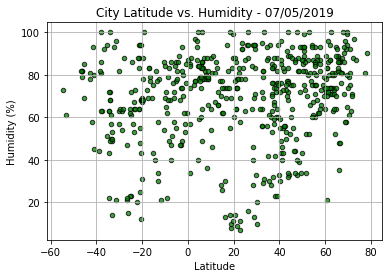

In [21]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(df_weather['Lat'], df_weather['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Humidity - 07/05/2019')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Humidity_vs_Lat.png')

plt.show()

## Latitude vs. Cloudiness Plot

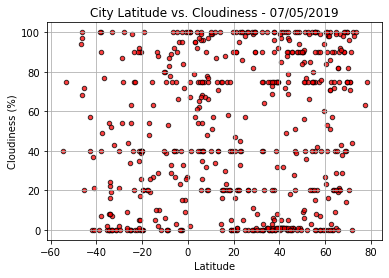

In [23]:
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Cloudiness - 07/05/2019')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Cloudiness_vs_Lat.png')

plt.show()

## Latitude vs. Wind Speed Plot

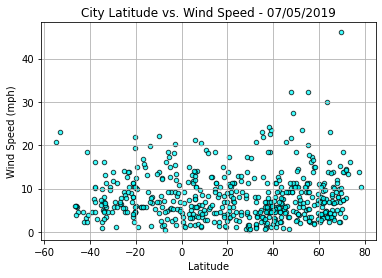

In [24]:
plt.scatter(df_weather['Lat'], df_weather['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Wind Speed - 07/05/2019')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Windspeed_vs_Lat.png')

plt.show()

## Linear Regression

In [90]:

north = (df["Lat"]>=0)
south = (df["Lat"]<=0)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7281241978404671


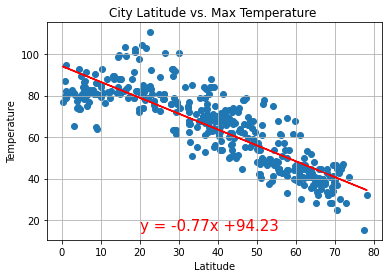

In [77]:
plt.scatter(df[north]["Lat"], df[north]['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature ')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Max_Temp_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[north]["Lat"],  df[north]['Max Temperature'])

# Get regression values
regress_values = df[north]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[north]["Lat"], df[north]['Max Temperature'])
plt.plot(df[north]["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6006708261048636


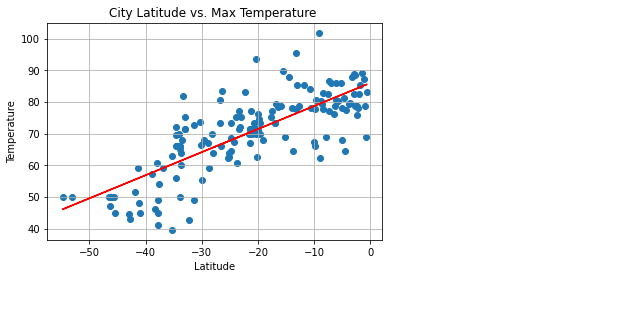

In [82]:
plt.scatter(df[south]["Lat"], df[south]['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature ')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Max_Temp_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[south]["Lat"],  df[south]['Max Temperature'])

# Get regression values
regress_values = df[south]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[south]["Lat"], df[south]['Max Temperature'])
plt.plot(df[south]['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01526318042639604


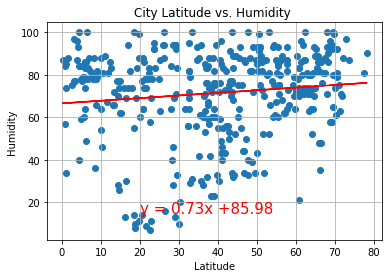

In [83]:
plt.scatter(df[north]["Lat"], df[north]['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Humidity ')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Humidity_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[north]["Lat"],  df[north]['Humidity'])

# Get regression values
regress_values = df[north]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[north]["Lat"], df[north]['Humidity'])
plt.plot(df[north]["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 9.014624725756173e-06


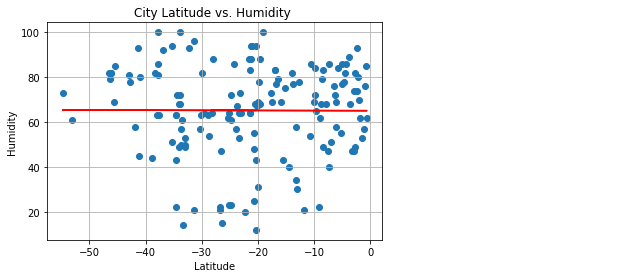

In [85]:
plt.scatter(df[south]["Lat"], df[south]['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Humidity ')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Humidity_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[south]["Lat"],  df[south]['Humidity'])

# Get regression values
regress_values = df[south]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[south]["Lat"], df[south]['Humidity'])
plt.plot(df[south]['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00018801614336985348


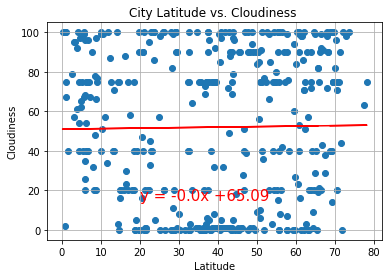

In [86]:
plt.scatter(df[north]["Lat"], df[north]['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Cloudiness ')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Cloudiness_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[north]["Lat"],  df[north]['Cloudiness'])

# Get regression values
regress_values = df[north]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[north]["Lat"], df[north]['Cloudiness'])
plt.plot(df[north]["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006918349406315572


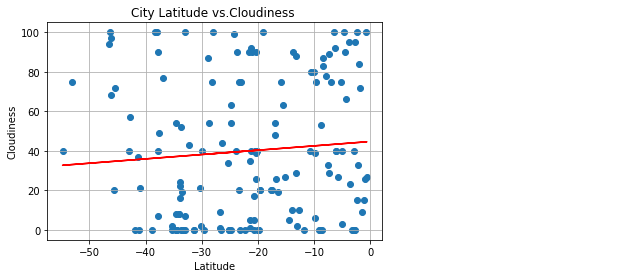

In [87]:
plt.scatter(df[south]["Lat"], df[south]['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs.Cloudiness ')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Cloudiness_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[south]["Lat"],  df[south]['Cloudiness'])

# Get regression values
regress_values = df[south]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[south]["Lat"], df[south]['Cloudiness'])
plt.plot(df[south]['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014131822168387865


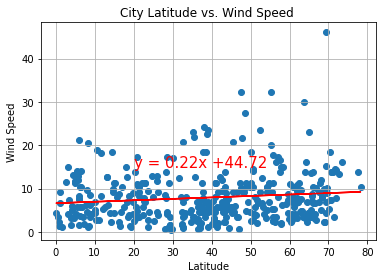

In [88]:
plt.scatter(df[north]["Lat"], df[north]['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed ')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Wind Speed_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[north]["Lat"],  df[north]['Wind Speed'])

# Get regression values
regress_values = df[north]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[north]["Lat"], df[north]['Wind Speed'])
plt.plot(df[north]["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006130716671858197


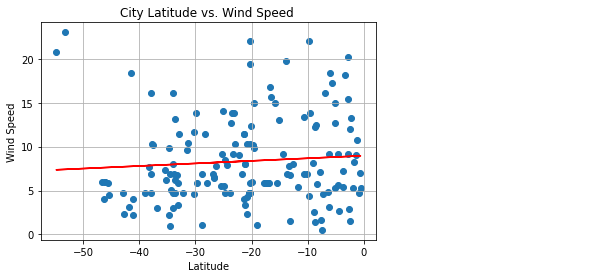

In [89]:
plt.scatter(df[south]["Lat"], df[south]['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed ')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Wind Speed_vs_Lat.png')



# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[south]["Lat"],  df[south]['Wind Speed'])

# Get regression values
regress_values = df[south]["Lat"]* slope + intercept


# Create Plot
plt.scatter(df[south]["Lat"], df[south]['Wind Speed'])
plt.plot(df[south]['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()